k means clustering

importing the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading the data

In [3]:
df=pd.read_excel('cust_data.xlsx')

In [4]:
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


data types and dimensions

In [5]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [6]:
df.shape

(30000, 38)

distrubition of variables

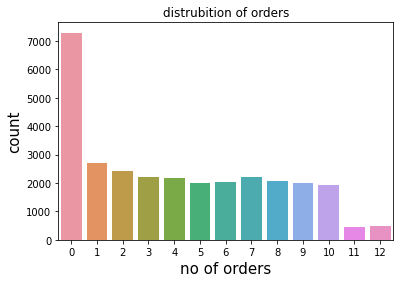

In [6]:
sns.countplot(data=df,x='Orders')
plt.title('distrubition of orders')
plt.xlabel('no of orders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

distrubition of the gender of the customers

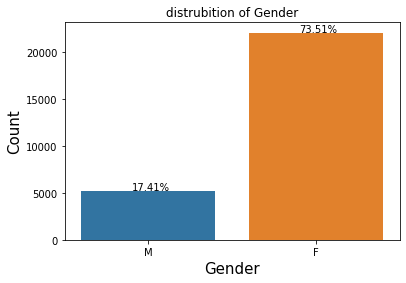

In [7]:
sns.countplot(data=df,x='Gender')
plt.title('distrubition of Gender')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(x=-0.1,y=df.Gender.value_counts()[1]+ 20, s=str(round((df.Gender.value_counts()[1])*100/len(df.Gender),2)) + '%')
plt.text(x=0.9,y=df.Gender.value_counts()[0]+ 20, s=str(round((df.Gender.value_counts()[0])*100/len(df.Gender),2)) + '%')
plt.show()

In [8]:
y=df.Gender.value_counts()
y[0]

22054

stastical summary

In [9]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


missing data treatment

In [10]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [11]:
df2=pd.get_dummies(df,columns=['Gender'])

In [12]:
df2.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,10,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [13]:
df2.isnull().sum()

Cust_ID                   0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

In [14]:
del df2['Cust_ID']

data visualiazation

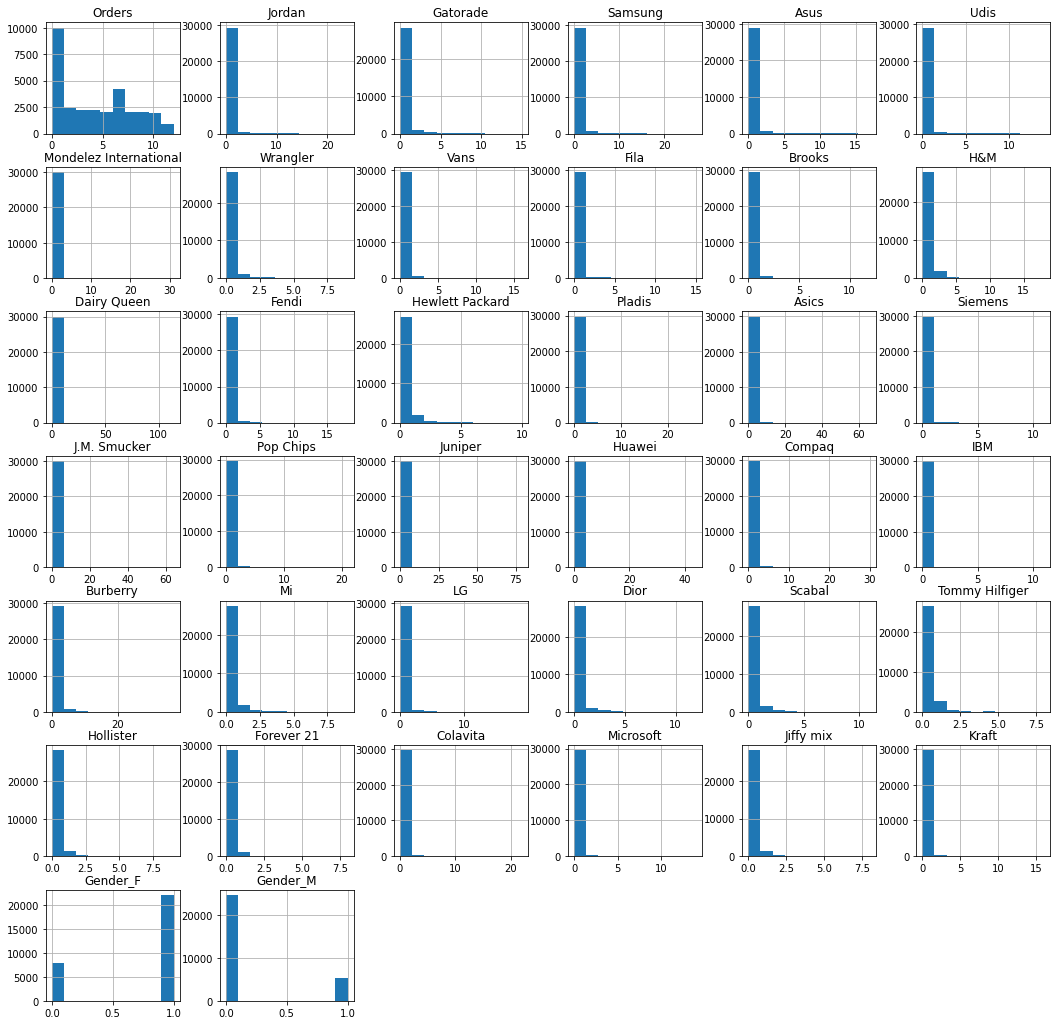

In [15]:
fig=df2.hist(figsize=(18,18))

k-means clustering

In [25]:
df3=df2.drop(['Orders','Gender_F','Gender_M'],axis=1)
df3.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(df3)
feature=scale.transform(df3)

In [27]:
df4=pd.DataFrame(feature,columns=df2.columns[1:36])
df4.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


building model

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df4)
    
    score=silhouette_score(df4,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 4, silhouette score is 0.28882936660509223)
For n_clusters = 5, silhouette score is 0.2734507732644202)
For n_clusters = 6, silhouette score is 0.21945733520582458)
For n_clusters = 7, silhouette score is 0.20381188273491108)
For n_clusters = 8, silhouette score is 0.19969011593382463)


In [29]:
model=KMeans(n_clusters=4,random_state=10)
model.fit(df4)

KMeans(n_clusters=4, random_state=10)

In [30]:
data_output=df2.copy(deep=True)
data_output['cluster']=model.labels_

In [31]:
data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,cluster
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


size of each cluster

In [32]:
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

Text(2.85, 2000, '701')

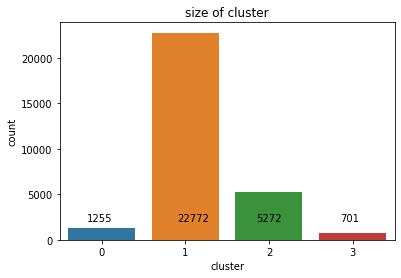

In [33]:
#plot a barplot to visualise the cluster size
sns.countplot(data=data_output,x='cluster')
plt.title('size of cluster')
plt.text(x=-.18,y=2000,s=np.unique(model.labels_,return_counts=True)[1][0])
plt.text(x=.9,y=2000,s=np.unique(model.labels_,return_counts=True)[1][1])
plt.text(x=1.85,y=2000,s=np.unique(model.labels_,return_counts=True)[1][2])
plt.text(x=2.85,y=2000,s=np.unique(model.labels_,return_counts=True)[1][3])

In [34]:
center=pd.DataFrame(model.cluster_centers_,columns=data_output.columns[1:36])
center.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


cluster analysis

cluster 1

In [35]:
cluster_1=sorted(zip(list(center.iloc[0,:]),list(center.columns)),reverse=True)[:10]
cluster_1

[(2.5683633928700136, 'Pladis'),
 (2.5566711435400644, 'Burberry'),
 (1.9227024096897503, 'Kraft'),
 (1.9073294208644702, 'Dairy Queen'),
 (1.5756195455231863, 'Jiffy mix'),
 (1.3963507697171866, 'LG'),
 (1.3913445112503924, 'Colavita'),
 (1.3864121214217748, 'Pop Chips'),
 (1.2075350473368518, 'J.M. Smucker'),
 (1.137030395763721, 'Tommy Hilfiger')]

size 

In [36]:
np.unique(model.labels_,return_counts=True)[1][0]

1255

sorting 

In [37]:
cluster_1_var=pd.DataFrame(cluster_1)[1]
cluster_1_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

statistical summary 

In [38]:
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==0].describe()

,Orders,Gender_F,Gender_M,cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


cluster 2

In [39]:
cluster_2=sorted(zip(list(center.iloc[1,:]),list(center.columns)),reverse=True)[:10]
cluster_2

[(-0.01730028322099846, 'IBM'),
 (-0.03901645356306144, 'Fila'),
 (-0.05530485199289185, 'Hewlett Packard'),
 (-0.05631154842238104, 'Compaq'),
 (-0.06899225921252913, 'Fendi'),
 (-0.0689989511279945, 'Microsoft'),
 (-0.07649272672740214, 'Colavita'),
 (-0.07678611218728777, 'Vans'),
 (-0.07932113224860492, 'Jiffy mix'),
 (-0.08274042329422185, 'Kraft')]

size 

In [40]:
np.unique(model.labels_,return_counts=True)[1][1]

22772

sorting 

In [41]:
cluster_2_var=pd.DataFrame(cluster_2)[1]
cluster_2_var

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

statical summary

In [42]:
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==1].describe()

,Orders,Gender_F,Gender_M,cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.705691,0.195547,1.0
std,3.606516,0.455741,0.396630,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


cluster 3

In [43]:
cluster_3=sorted(zip(list(center.iloc[2,:]),list(center.columns)),reverse=True)[:10]
cluster_3

[(0.7701757489709874, 'Scabal'),
 (0.5948559923975983, 'Jordan'),
 (0.5869420849637279, 'Hollister'),
 (0.5699901524200958, 'Gatorade'),
 (0.5655013593708315, 'Dior'),
 (0.5438465382729087, 'H&M'),
 (0.5358397875071617, 'Forever 21'),
 (0.5113016084652967, 'Udis'),
 (0.5044601305847997, 'Huawei'),
 (0.47445917154290623, 'Asus')]

size 

In [44]:
np.unique(model.labels_,return_counts=True)[1][2]

5272

sorting 

In [45]:
cluster_3_var=pd.DataFrame(cluster_3)[1]
cluster_3_var

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

statistical summary 

In [46]:
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==2].describe()

,Orders,Gender_F,Gender_M,cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.845220,0.089340,2.0
std,3.503566,0.361729,0.285261,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


cluster 4

In [47]:
cluster_4=sorted(zip(list(center.iloc[3,:]),list(center.columns)),reverse=True)[:10]
cluster_4

[(4.612421213336686, 'Siemens'),
 (3.7571061200806244, 'Asics'),
 (0.376241916516278, 'J.M. Smucker'),
 (0.11864320568860037, 'Pop Chips'),
 (0.06776496739127563, 'Juniper'),
 (0.0641429782115886, 'Huawei'),
 (0.041533950099074034, 'Mi'),
 (0.03042252234930063, 'Compaq'),
 (0.013628487938845083, 'Mondelez International'),
 (0.01094716225040182, 'Microsoft')]

size

In [48]:
np.unique(model.labels_,return_counts=True)[1][3]

701

sorting

In [49]:
cluster_4_var=pd.DataFrame(cluster_4)[1]
cluster_4_var

0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

statistical summary 

In [50]:
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==3].describe()

,Orders,Gender_F,Gender_M,cluster
count,701.000000,701.000000,701.000000,701.0
mean,4.402282,0.708987,0.209700,3.0
std,3.522693,0.454554,0.407385,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0


conclusion

In this case study , we have grouped the customers dataset into 4 clusters based on the brands they have searched on e-commerece sites. we have used the silhouette score method to find the optimum number of clusters and decided k=4 as the best pick after analysing the silhouette score .

After applying the K-means algorithms with an 4 number of clusters , we segmented the customers under 'Grocery','Appearls','Electronics'and 'Basket class' categories. These clusters give the information about the interest of the customer in the different brands. This type of segmentation can help the e-commerce companies , to know the customer choices and they can provide more accurate recommendation to the customers. 